In [136]:
#import libraries
import numpy 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import scipy.stats as st 
import dtale 
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
import pandas_profiling as pdp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve

In [137]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

In [138]:
fd_ori=fd_dlvry.copy(deep=True)
#future uses one copy create

In [139]:
fd_dlvry.shape

(388, 55)

In [140]:
fd_dlvry.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [141]:
fd_dlvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [142]:
# d = dtale.show(fd_dlvry)
# d.open_browser()
#we can use datle library for EDA

In [143]:
#looking data with pdp.ProfileReport 
# data = pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

# #Creating the Exploratory Data Analysis of our dataset
# report = pdp.ProfileReport(data, title='Pandas Profiling Report')

In [144]:
# report.widgets

In [145]:
#this library i found on google it's helpful for cleaning data,imputing value and lable encoding
import  datacleaner as dc # pip install datacleaner

In [146]:
dc.autoclean(fd_dlvry).head() 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,1,1,1,1,1,1,1,1,1,136
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,4,4,4,4,4,4,4,4,1,135
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,...,0,4,1,4,4,0,4,1,1,119
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,...,4,0,1,4,4,4,4,0,1,176
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,...,0,0,1,0,0,0,4,4,1,129


In [147]:
fd_dlvry.head() 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,1,1,1,1,1,1,1,1,1,136
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,4,4,4,4,4,4,4,4,1,135
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,...,0,4,1,4,4,0,4,1,1,119
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,...,4,0,1,4,4,4,4,0,1,176
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,...,0,0,1,0,0,0,4,4,1,129


In [148]:
fd_ori.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [149]:
l1=(fd_ori.columns[:])
l1

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [150]:
fd_dlvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    int32  
 2   Marital Status                             388 non-null    int32  
 3   Occupation                                 388 non-null    int32  
 4   Monthly Income                             388 non-null    int32  
 5   Educational Qualifications                 388 non-null    int32  
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [151]:
df=fd_ori.drop('Reviews',axis=1) #drop reviews because it's take NLP in future i will try it
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [152]:
%matplotlib inline

In [153]:
# we needs to back map for lable encoding 
lbl=dict()
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
                  lbl[i]=dict(zip(fd_ori[i].unique(), fd_dlvry[i].unique()))
    

In [154]:
lbl

{'Age': {20: 20,
  24: 24,
  22: 22,
  27: 27,
  23: 23,
  21: 21,
  28: 28,
  25: 25,
  32: 32,
  30: 30,
  31: 31,
  26: 26,
  18: 18,
  19: 19,
  33: 33,
  29: 29},
 'Gender': {'Female': 0, 'Male': 1},
 'Marital Status': {'Single': 2, 'Married': 0, 'Prefer not to say': 1},
 'Occupation': {'Student': 3,
  'Employee': 0,
  'Self Employeed': 2,
  'House wife': 1},
 'Monthly Income': {'No Income': 4,
  'Below Rs.10000': 2,
  'More than 50000': 3,
  '10001 to 25000': 0,
  '25001 to 50000': 1},
 'Educational Qualifications': {'Post Graduate': 2,
  'Graduate': 0,
  'Ph.D': 1,
  'Uneducated': 4,
  'School': 3},
 'Family size': {4: 4, 3: 3, 6: 6, 2: 2, 5: 5, 1: 1},
 'Medium (P1)': {'Food delivery apps': 1,
  'Walk-in': 2,
  'Direct call': 0,
  'Web browser': 3},
 'Medium (P2)': {' Web browser': 2, ' Direct call': 0, ' Walk-in': 1},
 'Meal(P1)': {'Breakfast': 0, 'Snacks': 3, 'Lunch': 2, 'Dinner': 1},
 'Meal(P2)': {' Lunch': 1, ' Dinner': 0, ' Snacks': 2},
 'Perference(P1)': {'Non Veg foods (L

In [155]:
# practice chi-squared test
# df=pd.crosstab(fd_ori['Meal(P1)'],fd_ori['Occupation'])
# df

# stat, p, dof, expected = st.chi2_contingency(df,correction=True)
# stat, p, dof, expected




#  method 1: Feature selection Cramér's V

In [156]:
#Cramer's V perform for find relation between 
crv={}
l1=[]
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
        '''we are not using lat and long because in EDA all location diffrent (reference dtale lib)'''
        df=pd.crosstab(fd_ori['Output'],fd_ori[i])
        stat, p, dof, expected = st.chi2_contingency(df,correction=True)
        t=min(df.shape)-1
        deno=sum(df.sum())*t
        x=numpy.sqrt(stat / deno)
        if(x>0.41): #thresold
             l1.append((i,x))


crv['Output']=l1
        
crv

{'Output': [('Age', 0.41916612670006054),
  ('Ease and convenient', 0.6944483749782563),
  ('Time saving', 0.6333333550979008),
  ('More restaurant choices', 0.5897138785369491),
  ('Easy Payment option', 0.5571767618313485),
  ('More Offers and Discount', 0.5564505912203883),
  ('Good Food quality', 0.4243449172824401),
  ('Good Tracking system', 0.41749280981704445),
  ('Maximum wait time', 0.4135981980209824)]}

In [157]:
#Extract the feature from above dictionary 
basic_f0=[]
for i in l1:
    basic_f0.append(i[0])

basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Maximum wait time']

In [158]:
X=fd_dlvry[basic_f0] # select X 
y=fd_dlvry['Output'] # select Y


In [159]:
%matplotlib inline

In [160]:
basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Maximum wait time']

<AxesSubplot:xlabel='Output', ylabel='count'>

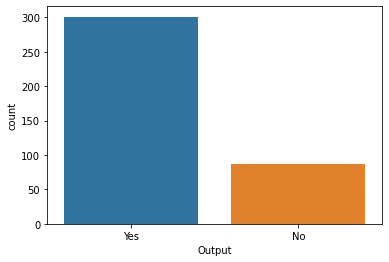

In [161]:
sns.countplot(fd_ori['Output']) # look target feature

#  KNN Algorithm  

In [162]:
# train_test_split by sklearn 
X=fd_dlvry[basic_f0]
y=fd_dlvry['Output']
# from imblearn.under_sampling import NearMiss
# nm=NearMiss()
# Make data balanced
from imblearn.over_sampling import RandomOverSampler
nm=RandomOverSampler(0.5)
X,y=nm.fit_sample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [163]:
fd_dlvry['Output'].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [164]:
X.shape,y.shape

((451, 9), (451,))

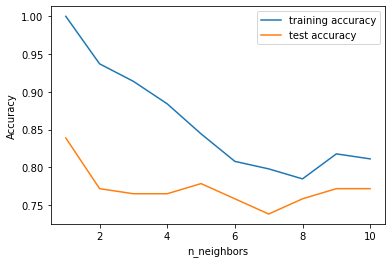

In [165]:
#select best knneighbour find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

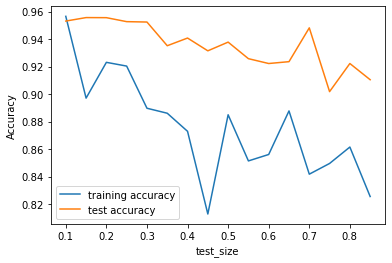

In [166]:
# appropriate test size find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)
knn = KNeighborsClassifier(n_neighbors = 3,p=1)
for i in test_size:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        knn.fit(X_train, y_train)
        training_accuracy.append(knn.score(X_test, y_test))
        test_accuracy.append(knn.score(X_train, y_train))
  

    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

In [167]:
#split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [168]:
# fit data and perform the knn algo
neigh = KNeighborsClassifier(n_neighbors=5,p=1)

knn=neigh.fit(X_train,y_train)

knn.score(X_test,y_test)


0.8761061946902655

In [169]:
#y_pred for confusion matrix
y_pred=knn.predict(X_test)

In [170]:
#confusion matrix 
cf_matrix_n=confusion_matrix(y_test, y_pred)
cf_matrix_n

array([[31,  9],
       [ 5, 68]], dtype=int64)

In [171]:
#classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        40
           1       0.88      0.93      0.91        73

    accuracy                           0.88       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.88      0.88      0.87       113



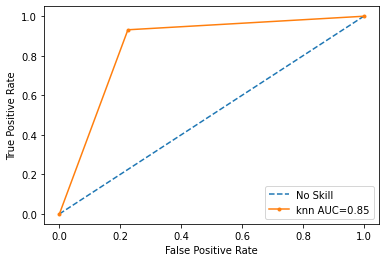

In [172]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


<b> Conclusion: </b>

In [173]:
'''Here weighted avg f1-score is good and AUC is greate but problems here Knn is not learning something
knn just use more memory space for perform operation and mostly features are categorical so noise affect
on this algorithms
'''

'Here weighted avg f1-score is good and AUC is greate but problems here Knn is not learning something\nknn just use more memory space for perform operation and mostly features are categorical so noise affect\non this algorithms\n'

<b> Cross-Validation </b>

In [174]:
#without StratifiedKFold 
Knn=KNeighborsClassifier(n_neighbors=5,p=1)
score=cross_val_score(knn,X,y,cv=12)
print("mean:="+str(score.mean()),"std :"+str(score.std()))

mean:=0.8872688477951636 std :0.06681880296221157


In [175]:
#with StratifiedKFold 
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    knn.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8947368421052632, 0.7631578947368421, 0.9473684210526315, 0.7894736842105263, 0.8947368421052632, 0.8157894736842105, 0.9473684210526315, 0.918918918918919, 0.918918918918919, 1.0, 0.8648648648648649, 0.972972972972973]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 76.31578947368422 %

Average Accuracy That can be obtained from this model is:: 0.8940256045519205

Standard Deviation is: 0.07036999832153723


# method 2: feature selection using sklearn 

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

In [41]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [42]:
#select feature 
l1=['latitude','longitude','Pin code','Output','Reviews']
X=fd_dlvry[fd_dlvry.columns[~fd_dlvry.columns.isin(l1)]]
y=fd_dlvry['Output']
nm=RandomOverSampler(0.5)
X,y=nm.fit_sample(X,y)
X.shape

(451, 50)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Feature 0: 10.229196
Feature 1: 0.078317
Feature 2: 18.725940
Feature 3: 15.056907
Feature 4: 10.833233
Feature 5: 4.633200
Feature 6: 0.596602
Feature 7: 0.191377
Feature 8: 0.048301
Feature 9: 0.809899
Feature 10: 0.278605
Feature 11: 6.385326
Feature 12: 0.090949
Feature 13: 3.394692
Feature 14: 3.144833
Feature 15: 1.993250
Feature 16: 7.814125
Feature 17: 6.285644
Feature 18: 5.858288
Feature 19: 0.071198
Feature 20: 51.605995
Feature 21: 12.036288
Feature 22: 16.185713
Feature 23: 0.074550
Feature 24: 24.366075
Feature 25: 5.401133
Feature 26: 13.133287
Feature 27: 2.221359
Feature 28: 0.299568
Feature 29: 21.284395
Feature 30: 1.895922
Feature 31: 0.136655
Feature 32: 0.109929
Feature 33: 0.634414
Feature 34: 10.189861
Feature 35: 19.622387
Feature 36: 6.912718
Feature 37: 5.197628
Feature 38: 4.206764
Feature 39: 9.297214
Feature 40: 0.710372
Feature 41: 0.047854
Feature 42: 1.954211
Feature 43: 2.637515
Feature 44: 0.555659
Feature 45: 6.717441
Feature 46: 7.991228
Feature 47:

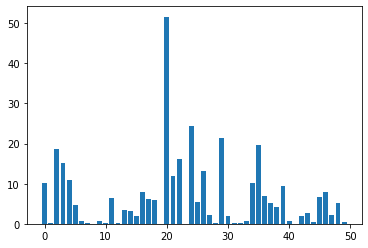

In [44]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

plt.show()

In [45]:
# Extract feature 
basic_f1=[]
for i in range(len(fs.scores_)):
    if(fs.scores_[i]>10): # set Thresold
        print(X_test.columns[i])
        basic_f1.append(X_test.columns[i])

Age
Marital Status
Occupation
Monthly Income
Self Cooking
Health Concern
Late Delivery
Bad past experience
Unaffordable
Delay of delivery person picking up food
Order Time
Maximum wait time


# KNN Algorithm 

In [46]:
X=fd_dlvry[basic_f1]
y=fd_dlvry['Output']

nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

In [47]:
X.shape

(602, 12)

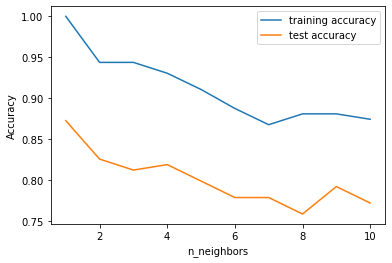

In [48]:
#neighbour find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i,p=1)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

In [49]:
# here some Extra work it's take long time to running
# plt.figure()
# training_accuracy = []
# test_accuracy = []
# # try n_neighbors from 1 to 10
# test_size= numpy.arange(0.1, 0.9,0.05)
# knn = KNeighborsClassifier(n_neighbors = 3)
# for i in test_size:
    
    
#     test_score = []
#     train_score=[]
#     for j in range(1,1000):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=6)
#         knn.fit(X_train, y_train)
#         test_score.append(knn.score(X_test, y_test))
#         train_score.append(knn.score(X_train, y_train))
  

       
#     training_accuracy.append(np.mean(train_score))
#     # record generalization accuracy
#     test_accuracy.append(np.mean(test_score))

# plt.plot(test_size,training_accuracy,label="training accuracy")
# plt.plot(test_size,test_accuracy,label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("test_size")
# plt.legend()

# plt.show()

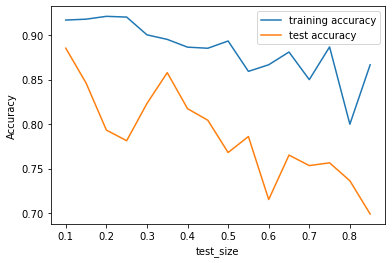

In [50]:
# appropriate test size find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)
knn = KNeighborsClassifier(n_neighbors = 5)
for i in test_size:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        knn.fit(X_train, y_train)
        training_accuracy.append(knn.score(X_train,y_train))
        test_accuracy.append(knn.score(X_test,y_test))
  

    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

In [51]:
#split data into test data and train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

neigh = KNeighborsClassifier(n_neighbors=5)

knn=neigh.fit(X_train,y_train)

knn.score(X_test,y_test)

0.8257261410788381

In [52]:
y_pred=knn.predict(X_test)

In [53]:
#confusion matrix 
cf_matrix_n=confusion_matrix(y_test, y_pred)
cf_matrix_n

array([[101,  21],
       [ 21,  98]], dtype=int64)

In [54]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       122
           1       0.82      0.82      0.82       119

    accuracy                           0.83       241
   macro avg       0.83      0.83      0.83       241
weighted avg       0.83      0.83      0.83       241



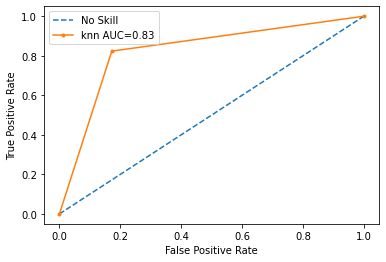

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


<b> Conclusion:</b>

In [56]:
'''feature selection method affect our model,AUC decrease as compare to the first one'''

'feature selection method affect our model,AUC decrease as compare to the first one'

<b> Cross-Validation </b>

In [57]:
#without StratifiedKFold 
Knn=KNeighborsClassifier(n_neighbors=5,p=1)
score=cross_val_score(knn,X,y,cv=12)
print("mean:="+str(score.mean()),"std :"+str(score.std()))

mean:=0.8407189542483663 std :0.045272986422210205


In [58]:
#with StratifiedKFold 
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    knn.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8235294117647058, 0.9019607843137255, 0.8, 0.82, 0.8, 0.92, 0.86, 0.78, 0.8, 0.84, 0.86, 0.88]

Maximum Accuracy That can be obtained from this model is: 92.0 %

Minimum Accuracy: 78.0 %

Average Accuracy That can be obtained from this model is:: 0.8404575163398693

Standard Deviation is: 0.04253224973982845


#  Logistics Regression


In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
# Here we are using  both method for feature selection  means we takes union both feature union

f_feature=list(set(basic_f0).union(set(basic_f1)))

In [179]:
f_feature

['Ease and convenient',
 'Unaffordable',
 'Bad past experience',
 'Monthly Income',
 'More restaurant choices',
 'Time saving',
 'Occupation',
 'More Offers and Discount',
 'Good Food quality',
 'Age',
 'Health Concern',
 'Self Cooking',
 'Order Time',
 'Marital Status',
 'Easy Payment option',
 'Late Delivery',
 'Good Tracking system',
 'Maximum wait time',
 'Delay of delivery person picking up food']

In [180]:
# Now we need to use some domain knowlegde for selecting feature 
'''Group 1: {'Ease and convenient','Easy Payment option'}
   Group 2 :{'Order Time','Time saving','Delay of delivery person picking up food','Maximum wait time'}'''
f_feature=['Ease and convenient','Self Cooking','Maximum wait time','More restaurant choices',
 'Unaffordable','More Offers and Discount','Good Food quality','Good Tracking system','Age','Bad past experience']

In [185]:
#select X,y 

X=fd_dlvry[f_feature]
y=fd_dlvry['Output']
from imblearn.under_sampling import NearMiss
# nm=NearMiss()
#try to making data balnaced 
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [186]:
X.shape

(602, 10)

In [187]:
f_feature

['Ease and convenient',
 'Self Cooking',
 'Maximum wait time',
 'More restaurant choices',
 'Unaffordable',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Age',
 'Bad past experience']

In [188]:
Lg=LogisticRegression()

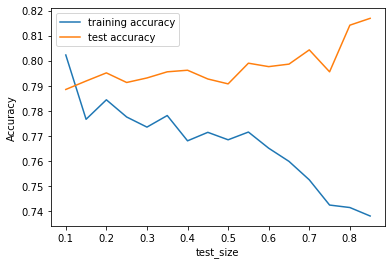

In [189]:
#
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)

for i in test_size:
        t_s=[]
        tn_=[]
        for j in range(0,50):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=np.random.randint(0,100))
            Lg.fit(X_train, y_train)
            
            t_s.append(Lg.score(X_test,y_test))
            tn_.append(Lg.score(X_train,y_train))
        training_accuracy.append(np.mean(t_s))
        test_accuracy.append(np.mean(tn_))


    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()




In [69]:
#data split into train and test size 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
Lg.fit(X_train,y_train)
Lg.score(X_test,y_test)

0.7679558011049724

In [70]:
y_pred=Lg.predict(X_test)

In [71]:
cf_matrix=confusion_matrix(y_test, y_pred)
cf_matrix

array([[76, 24],
       [18, 63]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       100
           1       0.72      0.78      0.75        81

    accuracy                           0.77       181
   macro avg       0.77      0.77      0.77       181
weighted avg       0.77      0.77      0.77       181



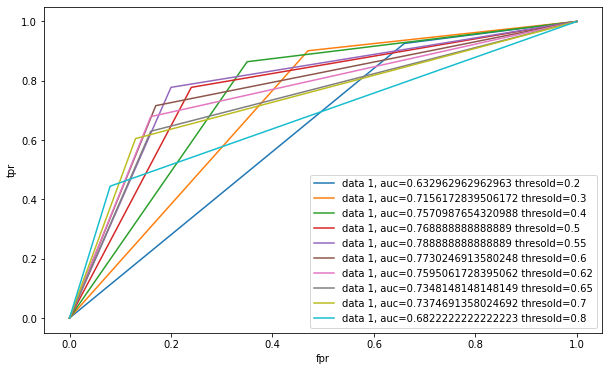

In [73]:
thresolds = [0.2,0.3,0.4,0.5,0.55,0.6,0.62,0.65,0.7,0.8]
plt.figure(figsize=(10,6))
for i in thresolds:
    y_pred_proba = (Lg.predict_proba(X_test)[:,1]>=i).astype(int)
    fpr, tpr, m= metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=f"data 1, auc={auc} thresold={i}")
    plt.legend(loc=4)



plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [74]:
'''In Knn weighted avg f1-score is good and AUC is great but problems in Knn is not learning something
knn just use more memory space for perform operation and mostly features are categorical so noise affect
on this algorithms. Here we can see if we set thresold 0.65 in Logistics regression we get better model  and here algorithms 
something learn 
'''

'In Knn weighted avg f1-score is good and AUC is great but problems in Knn is not learning something\nknn just use more memory space for perform operation and mostly features are categorical so noise affect\non this algorithms. Here we can see if we set thresold 0.65 in Logistics regression we get better model  and here algorithms \nsomething learn \n'

<b> Cross-Validation </b>

In [211]:
score=cross_val_score(Lg,X,y,cv=10)
print('List of possible accuracy:', score) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(score)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(score)) 
print('\nStandard Deviation is:',np.std(score)) 

List of possible accuracy: [0.75409836 0.81967213 0.85       0.76666667 0.73333333 0.78333333
 0.78333333 0.8        0.7        0.76666667]

Maximum Accuracy That can be obtained from this model is: 85.0 %

Minimum Accuracy: 75.0 %

Average Accuracy That can be obtained from this model is:: 0.7757103825136612

Standard Deviation is: 0.04039346516984209


In [212]:
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    Lg.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(Lg.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.7254901960784313, 0.7450980392156863, 0.84, 0.78, 0.78, 0.72, 0.8, 0.8, 0.78, 0.7, 0.84, 0.78]

Maximum Accuracy That can be obtained from this model is: 84.0 %

Minimum Accuracy: 70.0 %

Average Accuracy That can be obtained from this model is:: 0.7742156862745099

 Median Accuracy That can be obtained from this model is:: 0.78

Standard Deviation is: 0.04261060721508487


In [198]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(Lg, X, y, cv=cv)

array([0.86324786, 0.87179487, 0.82051282, 0.86324786, 0.86324786])

# DecisionTree (feature selection with both method)  

In [216]:
X=fd_dlvry[f_feature]
y=fd_dlvry['Output']
nm=RandomOverSampler() # try to making data balanced 
X,y=nm.fit_sample(X,y)
fd_dlvry['Output'].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [218]:
clf.score(X_test,y_test)

0.949748743718593

In [219]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1])

In [220]:
print(confusion_matrix(y_test,y_pred))

[[103   6]
 [  4  86]]


In [221]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       109
           1       0.93      0.96      0.95        90

    accuracy                           0.95       199
   macro avg       0.95      0.95      0.95       199
weighted avg       0.95      0.95      0.95       199



In [224]:
cross_val_score(clf, X, y, cv=12)

array([0.90196078, 0.92156863, 0.86      , 0.94      , 0.88      ,
       0.92      , 0.94      , 0.98      , 0.96      , 0.9       ,
       1.        , 0.9       ])

In [225]:
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(Lg.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.6862745098039216, 0.803921568627451, 0.82, 0.84, 0.84, 0.68, 0.76, 0.8, 0.78, 0.72, 0.82, 0.8]

Maximum Accuracy That can be obtained from this model is: 84.0 %

Minimum Accuracy: 68.0 %

Average Accuracy That can be obtained from this model is:: 0.7791830065359479

 Median Accuracy That can be obtained from this model is:: 0.8

Standard Deviation is: 0.05365685667449639


In [100]:
import graphviz
import sklearn.tree as tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='01',
                                filled=True)

# # Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph.render('gini')
# graph

'gini.png'

# Feature selection with Decision Tree 

In [226]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

fd_dlvry.drop(['Pin code','longitude','latitude','Reviews'],axis=1,inplace=True)

fd_dlvry['Output']=fd_dlvry['Output'].replace({'Yes':1,'No':0})

In [230]:
fd_ori=fd_dlvry.copy(deep=True)


In [231]:
df=pd.get_dummies(fd_dlvry)

In [232]:
df.shape

(388, 223)

In [233]:
l1=[]
for i in df.columns:
    if(i!='Output'):
        l1.append(i)
    

In [234]:
X=df[l1]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [236]:
clf.score(X_test,y_test)

0.9748743718592965

In [237]:
clf.feature_importances_

array([0.03070053, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05353464, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00096135,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03046207, 0.        , 0.        , 0.46930772,
       0.        , 0.        , 0.        , 0.        , 0.12976114,
       0.        , 0.        , 0.        , 0.        , 0.02783055,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03063501, 0.        , 0.        , 0.        , 0.     

In [238]:
def sortSecond(val):
    return val[1]


values = clf.feature_importances_

importances = [(l1[i], values[i]) for i in range(len(l1))]
importances.sort(reverse=True, key=sortSecond)

In [239]:
l1=[]
for i in importances[:12]:
    l1.append(i[0])


In [240]:
l1

['Ease and convenient_Disagree',
 'Time saving_Disagree',
 'Unaffordable_Agree',
 'Occupation_Employee',
 'Missing item_Neutral',
 'Age',
 'Good Food quality_Neutral',
 'Perference(P2)_ Sweets',
 'More restaurant choices_Disagree',
 'High Quality of package_Important',
 'Missing item_Strongly agree',
 'Late Delivery_Agree']

In [241]:
X=df[l1]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [243]:
clf.score(X_test,y_test)

0.949748743718593

In [244]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0], dtype=int64)

In [245]:
print(confusion_matrix(y_test,y_pred))

[[92  6]
 [ 4 97]]


In [246]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        98
           1       0.94      0.96      0.95       101

    accuracy                           0.95       199
   macro avg       0.95      0.95      0.95       199
weighted avg       0.95      0.95      0.95       199



In [247]:
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.9019607843137255, 0.9607843137254902, 0.94, 0.98, 0.98, 0.98, 0.88, 0.98, 0.94, 0.94, 0.94, 0.94]

Maximum Accuracy That can be obtained from this model is: 98.0 %

Minimum Accuracy: 88.0 %

Average Accuracy That can be obtained from this model is:: 0.9468954248366012

 Median Accuracy That can be obtained from this model is:: 0.94

Standard Deviation is: 0.030698000780370986


In [248]:
import graphviz
import sklearn.tree as tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='01',
                                filled=True)

# # Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph.render('fgini')
# graph

'fgini.png'